In [1]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 5.9 MB/s 


In [2]:
from osgeo import gdal
import numpy as np
import rasterio
import rasterio.plot
import matplotlib
from matplotlib import pyplot as plt

In [3]:
# Root Directory
Image_Segmentation_Path = '/content/drive/My Drive/Image Segmentation/'

# Inputs/Sources
Processed_DEMs_Path = Image_Segmentation_Path + "Processed DEMs/"
high_dem_interpolated = Processed_DEMs_Path + "high_dem_interpolated.tif"
test_dem = Image_Segmentation_Path + 'Source DEMs/test_dem.tif'

# Outputs/Destinations
slope_path = Processed_DEMs_Path + "slope.tif"
aspect_path = Processed_DEMs_Path + "aspect.tif"
hillshade_path = Processed_DEMs_Path + "hillshade.tif"

# transformed_path = Processed_DEMs_Path + "high_dem_transformed.tif"
transformed_path = Processed_DEMs_Path + "1.tif"
slope_transformed_path = Processed_DEMs_Path + "slope_transformed.tif"
aspect_transformed_path = Processed_DEMs_Path + "aspect_transformed.tif"
test_dem_transformed = Processed_DEMs_Path + 'test_dem_transformed.tif'
test_dem_slope = Processed_DEMs_Path + 'test_dem_slope.tif'
test_dem_hillshade = Processed_DEMs_Path + 'test_dem_hillshade.tif'
# PNGs for the report 
PNG_Path = Image_Segmentation_Path + "PNG/"

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
with rasterio.open(DEM) as dataset:
    profile =dataset.profile
    meta = dataset.meta
    array=dataset.read(1)
    no_data_value = meta["nodata"]

no_data_value

NameError: ignored

In [ ]:
def transform_values(DEM, transformed_path):
    with rasterio.open(DEM) as dataset:
        profile =dataset.profile
        meta = dataset.meta
        array=dataset.read(1)
        no_data_value = meta["nodata"]
        array[array == no_data_value] = np.nan
    transformed_array = np.interp(array, (np.nanmin(array),np.nanmax(array)), (0,255))
    # transformed_array = scaler.fit_transform(array)
    transformed_array[np.isnan(transformed_array)] = -1
    with rasterio.open(transformed_path, 'w', **profile) as dest: 
      dest.write_band(1, transformed_array)
    return transformed_array

In [ ]:
def calculate_slope(DEM, slope_path):
    gdal.DEMProcessing(slope_path, DEM, 'slope')
    transform_values(DEM=slope_path, transformed_path=slope_transformed_path)
    with rasterio.open(slope_transformed_path) as dataset:
        slope=dataset.read(1)
    return slope

def calculate_aspect(DEM, aspect_path):
    gdal.DEMProcessing(aspect_path, DEM, 'aspect')
    transform_values(DEM=aspect_path, transformed_path=aspect_transformed_path)
    with rasterio.open(aspect_transformed_path) as dataset:
        aspect=dataset.read(1)
    return aspect

def calculate_hillshade(DEM, hill_shade_path):
    gdal.DEMProcessing(hill_shade_path, DEM, 'hillshade')
    with rasterio.open(hill_shade_path) as dataset:
        hillshade=dataset.read(1)
    return hillshade

In [ ]:
tmp = transform_values(DEM=high_dem_interpolated, transformed_path=transformed_path)


In [ ]:
np.min(tmp)
np.nanmin(tmp)

-1.0

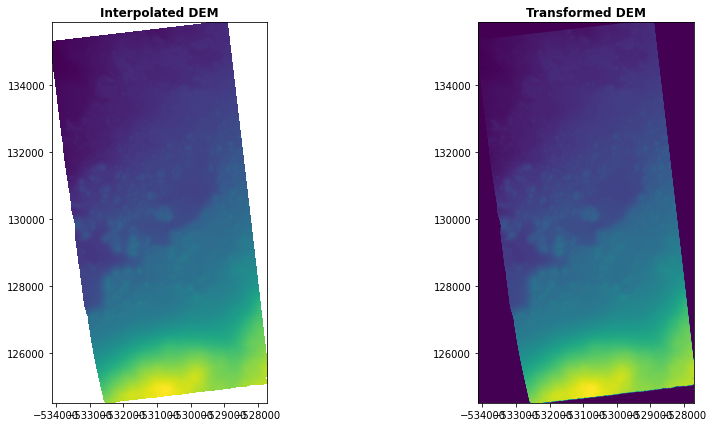

In [ ]:
fig, (ax_interpolated, ax_transformed) = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
with rasterio.open(high_dem_interpolated) as dem:  
  rasterio.plot.show(dem, ax=ax_interpolated, title='Interpolated DEM')
with rasterio.open(transformed_path) as dem:  
  rasterio.plot.show(dem,  ax=ax_transformed, title='Transformed DEM')
# fig.savefig(PNG_Path+"Transformed DEM.png")

In [ ]:
# test = transform_values(DEM=test_dem, transformed_path=test_dem_transformed)

In [ ]:
aspect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
slope=calculate_slope(DEM=transformed_path, slope_path=slope_path)
# aspect=calculate_aspect(DEM=high_dem_interpolated, aspect_path=aspect_path)
hillshade=calculate_hillshade(DEM=transformed_path, hill_shade_path=hillshade_path)

In [ ]:
slope=calculate_slope(DEM=test_dem, slope_path=test_dem_slope)
hillshade=calculate_hillshade(DEM=test_dem, hill_shade_path=test_dem_hillshade)

In [ ]:
print(np.min(slope))

0.0


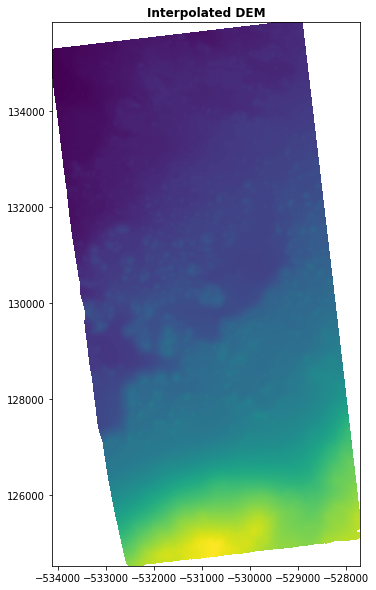

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
dem = rasterio.open(high_dem_interpolated)
rasterio.plot.show(dem, title='Interpolated DEM')
fig.savefig(PNG_Path+"Interpolated DEM.png")

In [ ]:
arr =dem.read(1)
pure = arr[arr != dem.meta['nodata']]

In [ ]:
len(pure)

72773702

In [ ]:
np.min(pure)

0.0

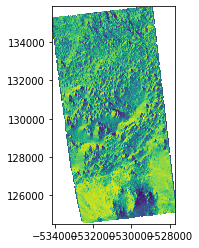

In [ ]:
with rasterio.open(aspect_path) as aspect:
  rasterio.plot.show(aspect)
# fig.savefig(PNG_Path+"Aspect.png")

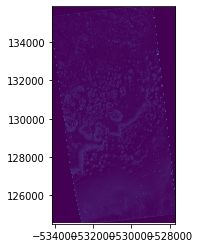

In [ ]:
with rasterio.open(slope_path) as slope:
  rasterio.plot.show(slope)
# fig.savefig(PNG_Path+"Slope")

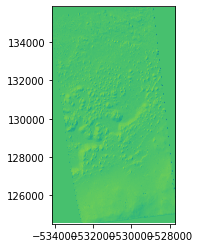

In [ ]:
with rasterio.open(hillshade_path) as hill:
  rasterio.plot.show(hill)
# fig.savefig(PNG_Path+"Hillshade.png")


In [ ]:
# !pip install richdem
import richdem as rd

In [ ]:
tmp2 = rasterio.open(high_dem_interpolated)

In [ ]:
t = tmp2.read(1)

In [ ]:
np.max(t)

-1595.2224

In [ ]:
np.min(t)

-32767.0

In [ ]:
tt = np.interp(t, (np.nanmin(t),np.nanmax(t)), (0,255))

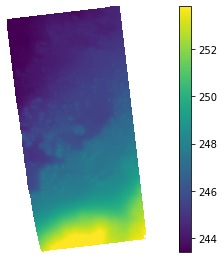

{'vmax': 253.79495546825842, 'vmin': 243.43623313014584}

In [ ]:
dem_rda = rd.rdarray(tt, no_data=0)
rd.rdShow(dem_rda, axes=False, cmap='viridis')

In [ ]:
np.max(tt)

255.0

In [ ]:
np.min(tt)

0.0